In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [29]:
df=pd.read_csv("fire_nrt_M6_96619.csv")

In [30]:
df1=pd.read_csv("fire_nrt_V1_96617.csv")

In [31]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [5]:
import contextily as ctx

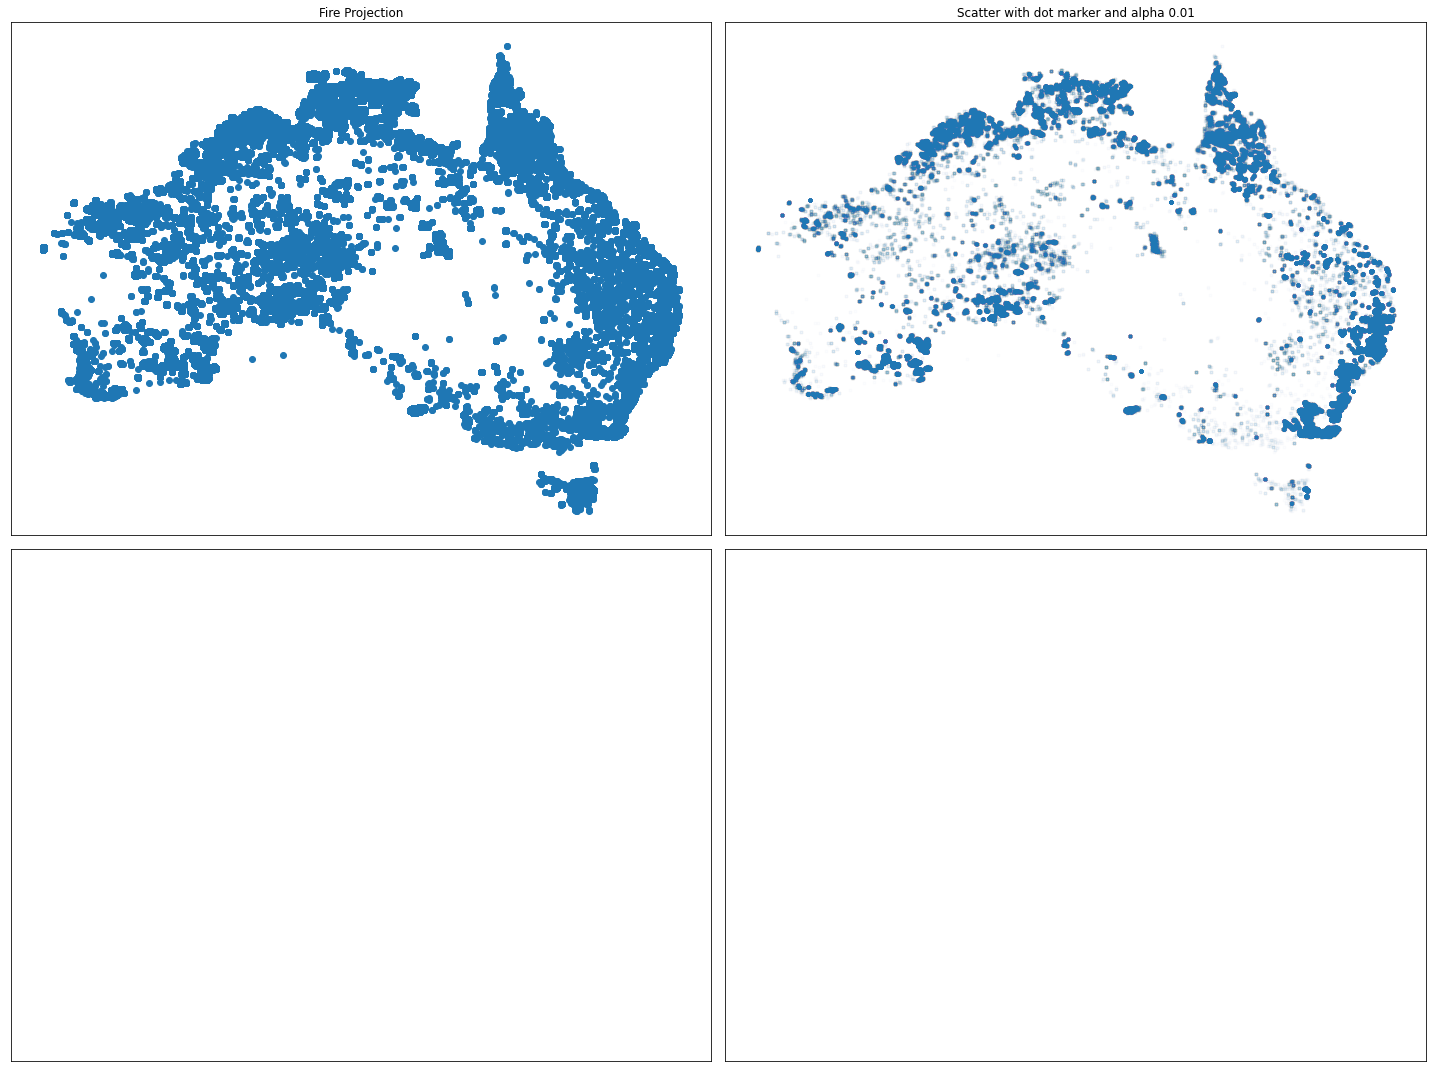

In [26]:
fig, axes = plt.subplots(2,2, figsize =(20,15), subplot_kw={'xticks': (), 'yticks': ()})
axes[0,0].scatter(df1.longitude,df1.latitude)
axes[0,0].set_title("Fire Projection")
axes[0,1].scatter(df1.longitude,df1.latitude, alpha=0.01, marker=".")
axes[0,1].set_title("Scatter with dot marker and alpha 0.01")

plt.tight_layout()
plt.show()


In [33]:
df["brightness"].describe()

count    183593.000000
mean        339.058568
std          28.605291
min         300.000000
25%         320.800000
50%         334.300000
75%         348.600000
max         507.000000
Name: brightness, dtype: float64

In [50]:

def op(x):
    if x<301:
        return 0
    elif 300<x<311:
        return 1
    elif 311<x<321:
        return 2
    elif 321<x<350:
        return 3   
    elif 351<x<520:
        return 4
        

In [51]:
df["brcat"]=df["brightness"].apply(op)

In [52]:
df["brcat"]

0         3.0
1         3.0
2         2.0
3         2.0
4         3.0
         ... 
183588    0.0
183589    0.0
183590    1.0
183591    1.0
183592    0.0
Name: brcat, Length: 183593, dtype: float64

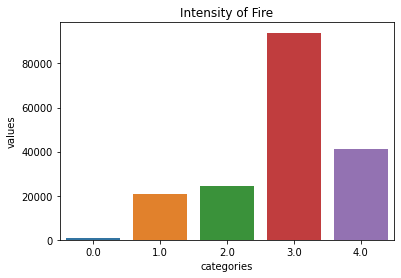

In [55]:
sns.countplot(df["brcat"])
plt.title('Intensity of Fire')
plt.xlabel('categories')
plt.ylabel('values')
 
 
 
# Show graphic
plt.show()


In [67]:
y=df["daynight"].value_counts().reset_index()

In [68]:
y

,index,daynight
0,D,113467
1,N,70126


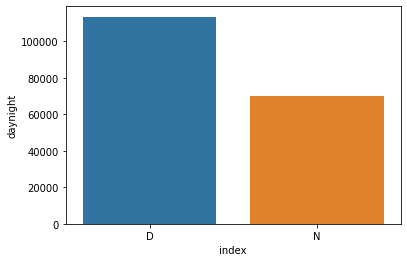

In [69]:
sns.barplot(x=y["index"],y=y["daynight"])

In [ ]:
#Fires are common in daytime